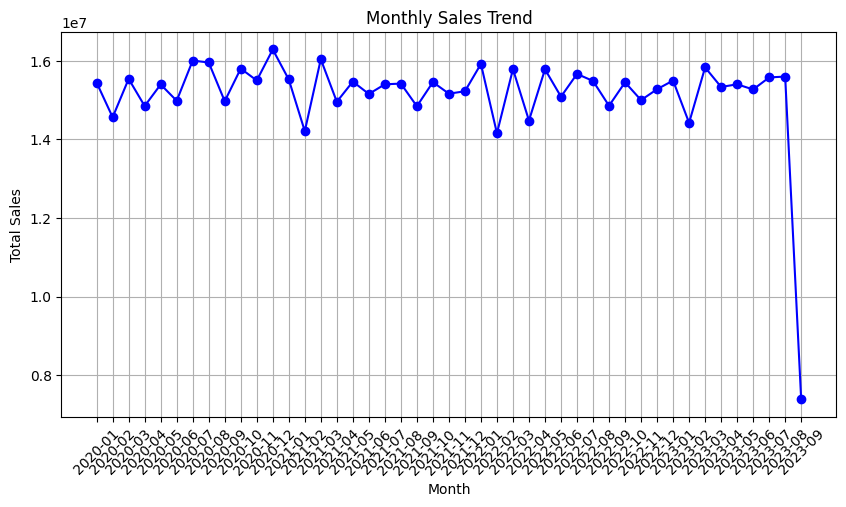

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("C:/Users/reddy/Downloads/global air pollution dataset.csv/ecommerce_customer_data_custom_ratios.csv")


# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month
df['Month'] = df['Purchase Date'].dt.strftime('%Y-%m')

# Calculate total sales per month
monthly_sales = df.groupby('Month')['Total Purchase Amount'].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()

plt.show()





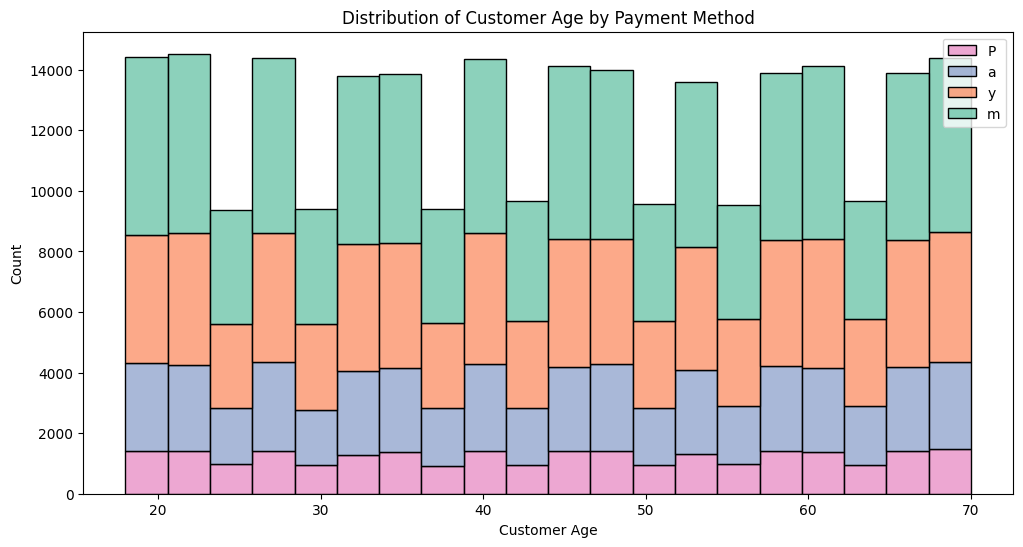

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Customer Age", hue="Payment Method", multiple="stack", bins=20, palette="Set2")

plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.title("Distribution of Customer Age by Payment Method")
plt.legend("Payment Method")  # Corrected

plt.show()

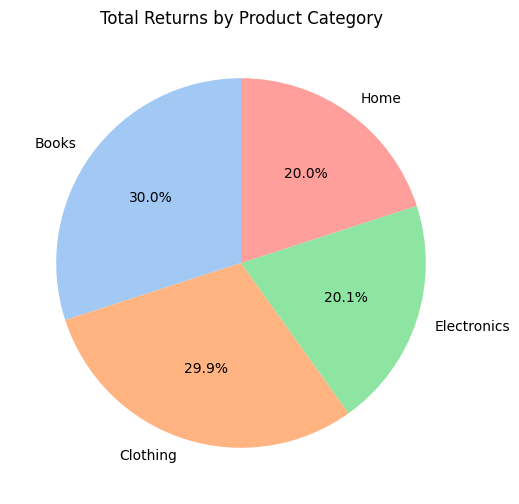

In [8]:
category_returns = df.groupby("Product Category")['Returns'].sum()

# Create Pie Chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')  # Using Seaborn's color palette

plt.pie(category_returns, labels=category_returns.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Total Returns by Product Category")
plt.show()


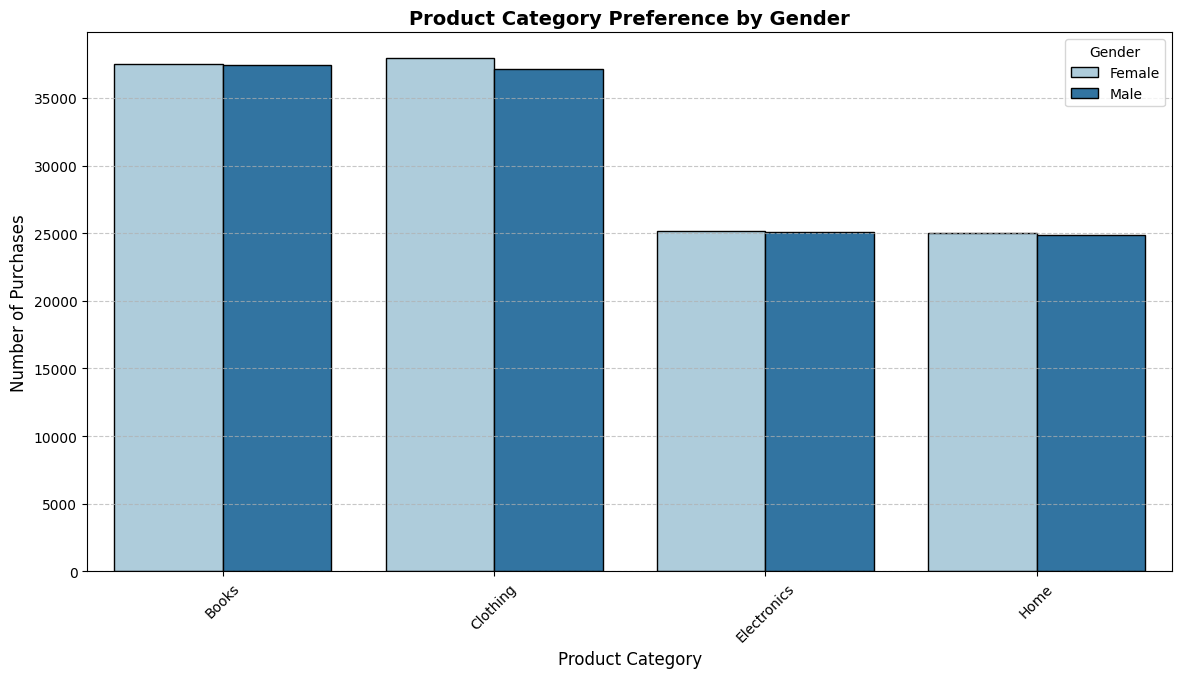

In [26]:
category_gender_counts = df.groupby(["Product Category", "Gender"]).size().reset_index(name="Count")

# Plot using a grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=category_gender_counts, x="Product Category", y="Count", hue="Gender", palette="Paired", edgecolor="black")

plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.title("Product Category Preference by Gender", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Gender", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

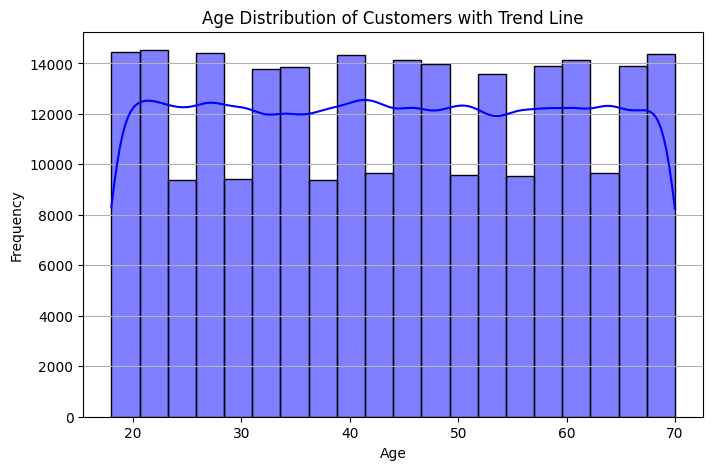

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, color="blue", kde=True)  # KDE adds the trend line
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Customers with Trend Line")
plt.grid(axis="y")
plt.show()

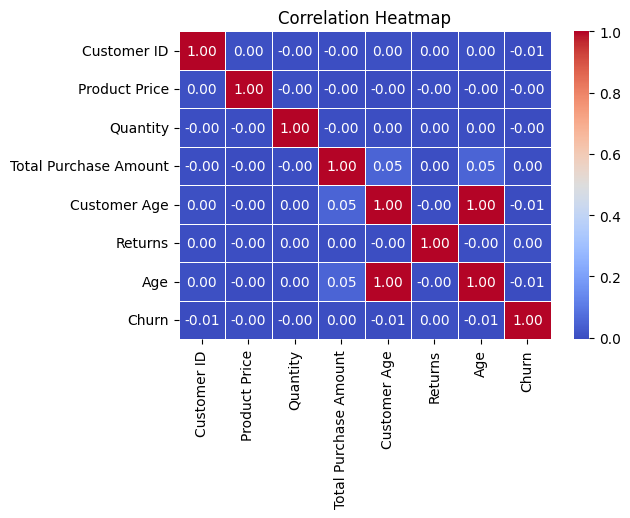

In [11]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap: Correlation Between Variables
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 

plt.title("Correlation Heatmap")
plt.show()

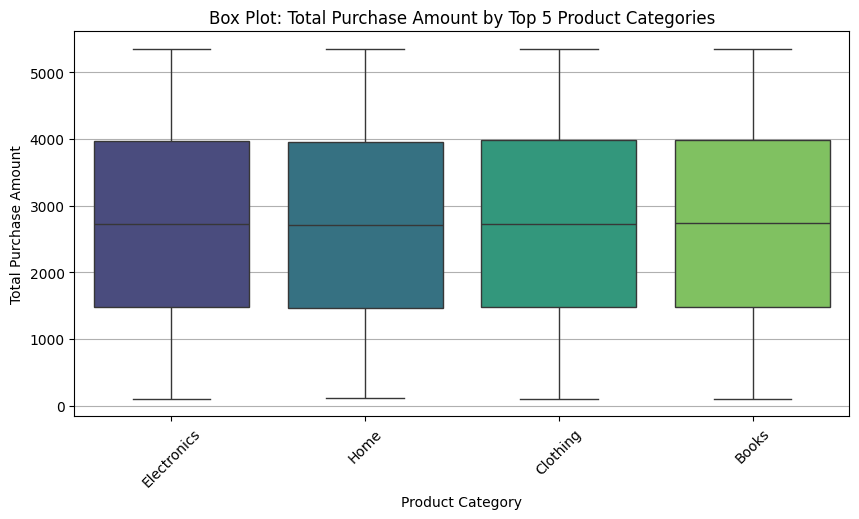

In [12]:
df["Total Purchase Amount"] = pd.to_numeric(df["Total Purchase Amount"], errors='coerce')

# Identify top 5 product categories by total sales
top_categories = df.groupby('Product Category')['Total Purchase Amount'].sum().nlargest(5).index

# Filter dataset to include only these categories
df = df[df['Product Category'].isin(top_categories)]

# Box Plot: Distribution of Total Purchase Amount for Top 5 Product Categories
plt.figure(figsize=(10, 5))
sns.boxplot(x='Product Category', y='Total Purchase Amount', data=df, hue='Product Category', palette="viridis", legend=False)  # ✅ Fix applied

plt.xlabel("Product Category")
plt.ylabel("Total Purchase Amount")
plt.title("Box Plot: Total Purchase Amount by Top 5 Product Categories")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

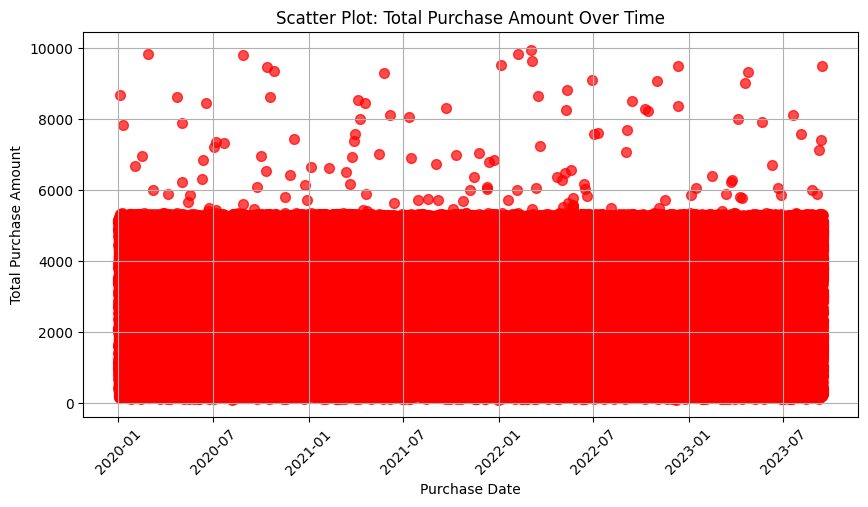

In [13]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Aggregate total sales by purchase date
df_grouped = df.groupby('Purchase Date')['Total Purchase Amount'].sum()

# Scatter Plot: Purchase Date vs. Total Purchase Amount
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped.index, df_grouped.values, color='red', s=50, alpha=0.7)

plt.xlabel("Purchase Date")
plt.ylabel("Total Purchase Amount")
plt.title("Scatter Plot: Total Purchase Amount Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

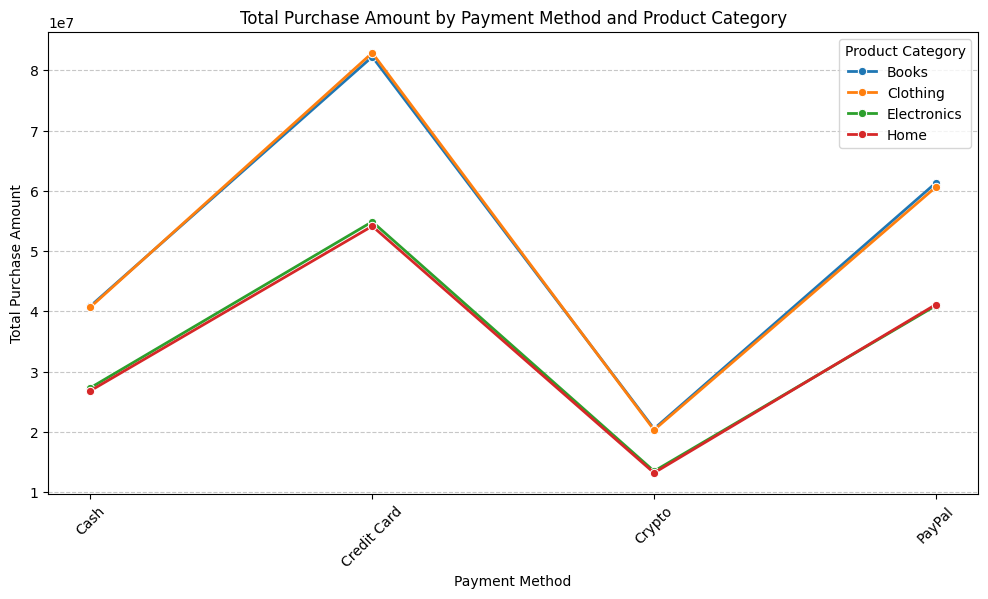

In [28]:
# Summarize total purchase amount by payment method and product category
purchase_summary = df.groupby(["Payment Method", "Product Category"])["Total Purchase Amount"].sum().reset_index()

# Plot using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=purchase_summary, x="Payment Method", y="Total Purchase Amount", hue="Product Category", marker="o", linewidth=2)

# Labels and title
plt.xlabel("Payment Method")
plt.ylabel("Total Purchase Amount")
plt.title("Total Purchase Amount by Payment Method and Product Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Product Category")

# Show plot
plt.show()

<Figure size 1400x700 with 0 Axes>

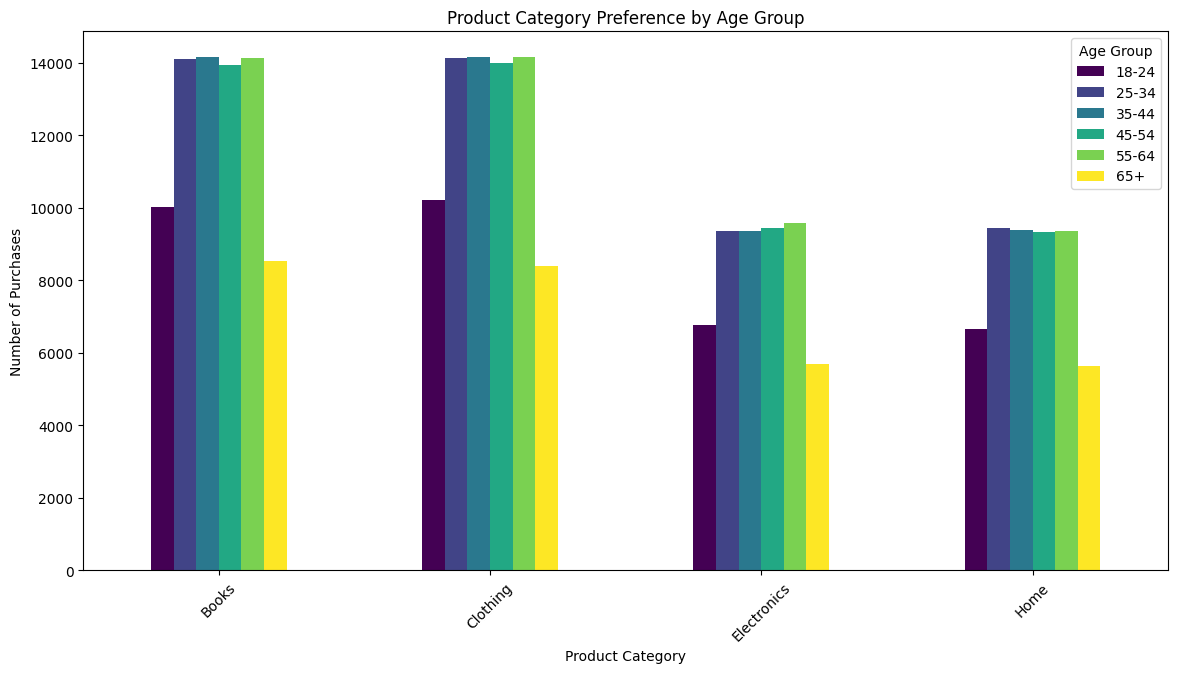

In [21]:
bins = [18, 25, 35, 45, 55, 65, 100]  # Age ranges
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# Create Age Group column
df["Age Group"] = pd.cut(df["Customer Age"], bins=bins, labels=labels, right=False)

# Count purchases per product category by age group (explicitly setting observed=False)
category_age_counts = df.groupby(["Product Category", "Age Group"], observed=False).size().unstack()

# Plot
plt.figure(figsize=(14, 7))
category_age_counts.plot(kind="bar", figsize=(14, 7), colormap="viridis")

plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.title("Product Category Preference by Age Group")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()